# 🎓 IIMK Professional Certificate in Data Science and AI for Managers

## 📊 Assignment 9.1: Supervised Learning and Classification Models

### 👨‍🎓 Student Information:
- **Name:** Lalit Nayyar
- **Email:** lalitnayyar@gmail.com
- **Course:** Professional Certificate in Data Science and Artificial Intelligence for Managers
- **Institution:** Indian Institute of Management Kozhikode (IIMK)

## 📋 Assignment Overview

🔍 This project implements supervised learning techniques to predict income levels using the Adult Income Dataset. The assignment focuses on understanding classification models, their performance metrics, and data preprocessing techniques.

### Dataset Description
The Adult Income Dataset, also known as the Census Income dataset, contains demographic and employment-related features to predict whether an individual's annual income exceeds $50,000. This real-world dataset presents various data preprocessing and modeling challenges that are common in practical machine learning applications.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('default')  # Use default matplotlib style
sns.set_theme()  # Set seaborn theme
%matplotlib inline

## 1. Data Preprocessing 🔄

### 1.a. Loading the Dataset

We begin by loading the Adult Income dataset. This dataset contains various demographic and employment-related features such as age, education, occupation, and other socio-economic factors that might influence an individual's income level.

The dataset features include:
- Numerical attributes: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
- Categorical attributes: workclass, education, marital-status, occupation, relationship, race, sex, native-country

In [2]:
# Define column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names=columns, skipinitialspace=True)

# Display the first few rows and basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (32561, 15)

First few rows of the dataset:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.b. Exploratory Data Analysis (EDA)

Let's perform a comprehensive analysis of our dataset to understand:
- Data types of each feature
- Missing values
- Basic statistics of numerical columns
- Distribution of categorical variables

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumerical Columns Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing Values:
age               0
workclass         0
fnlwgt            0
ed

In [4]:
# Analyze categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(normalize=True).head())


Unique values in workclass:
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Name: proportion, dtype: float64

Unique values in education:
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
Name: proportion, dtype: float64

Unique values in marital-status:
marital-status
Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
Separated             0.031479
Widowed               0.030497
Name: proportion, dtype: float64

Unique values in occupation:
occupation
Prof-specialty     0.127146
Craft-repair       0.125887
Exec-managerial    0.124873
Adm-clerical       0.115783
Sales              0.112097
Name: proportion, dtype: float64

Unique values in relationship:
relationship
Husband          0.405178
Not-in-family    0.255060
Own-child        0.155646
Unmarried   

### 1.c. Handling Missing and Erroneous Data

In this dataset, missing values are denoted by '?' rather than standard NULL or NaN values. We need to:
1. Identify these non-standard missing values
2. Replace them with appropriate values
3. Document our approach and rationale

In [5]:
# Replace '?' with NaN to properly handle missing values
df = df.replace('?', np.nan)

# Display missing value count after replacement
print("Missing values after replacement:")
print(df.isnull().sum())

# Handle missing values using mode imputation
for column in df.columns:
    if df[column].isnull().any():
        # Using the recommended approach to avoid the warning
        df.loc[:, column] = df[column].fillna(df[column].mode()[0])

print("\nVerifying no missing values remain:")
print(df.isnull().sum().sum())

Missing values after replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Verifying no missing values remain:
0


## 2. Data Encoding 🔢

### 2.a. Converting Categorical Variables

We'll use Label Encoding for ordinal categorical variables and One-Hot Encoding for nominal categorical variables to preserve their interpretability.

**Rationale for encoding choices:**
- Label Encoding: Used for ordinal variables like 'education' where there's a natural order
- One-Hot Encoding: Used for nominal variables like 'workclass' where there's no inherent order

In [6]:
# Identify categorical columns for encoding
ordinal_columns = ['education']
nominal_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Label Encoding for ordinal variables
label_encoders = {}
for column in ordinal_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# One-Hot Encoding for nominal variables
df = pd.get_dummies(df, columns=nominal_columns, prefix=nominal_columns)

print("Dataset shape after encoding:", df.shape)
print("\nFirst few columns:")
df.head()

Dataset shape after encoding: (32561, 91)

First few columns:


,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,13,2174,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,9,13,0,0,13,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,11,9,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,1,7,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,9,13,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3. Feature Selection and Engineering 🔍

### 3.a. Correlation Analysis

We'll analyze feature relationships and importance through correlation analysis, focusing on:
1. Correlation between numerical features
2. Identifying potential multicollinearity
3. Feature importance relative to our target variable (income)

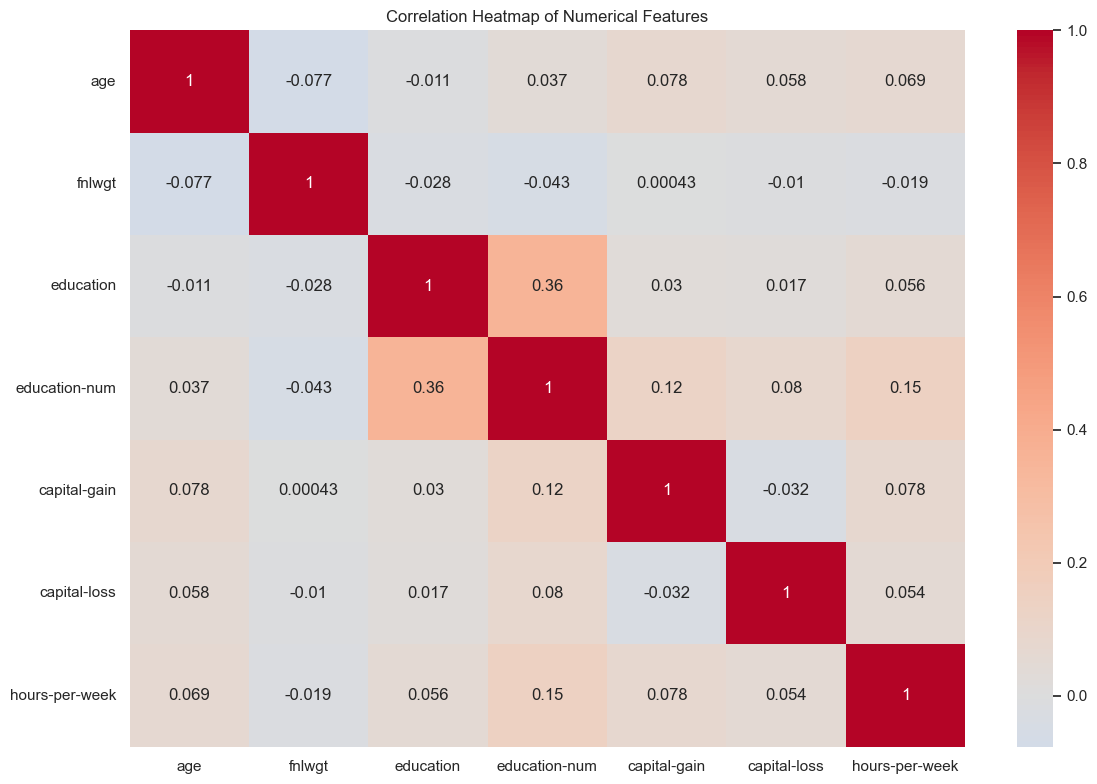

In [7]:
# Calculate correlation matrix for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### 3.b. Feature Engineering

Based on our analysis and domain knowledge, we'll create new features that might enhance model performance:
1. Age groups (binning age into meaningful categories)
2. Income-related ratios
3. Work-life balance indicators

In [8]:
# Create age groups
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 25, 35, 45, 55, 65, 100],
                        labels=['Young', 'Early-Career', 'Mid-Career', 'Late-Career', 'Pre-Retirement', 'Retirement'])

# Create work-life balance indicator
df['work_intensity'] = df['hours-per-week'].apply(lambda x: 'High' if x > 40 else 'Normal' if x >= 35 else 'Part-time')

# Create capital utilization ratio
df['capital_utilization'] = (df['capital-gain'] - df['capital-loss']) / (df['capital-gain'] + df['capital-loss'] + 1)

# One-hot encode the new categorical features
df = pd.get_dummies(df, columns=['age_group', 'work_intensity'])

print("Final dataset shape:", df.shape)
print("\nNew features:")
new_features = [col for col in df.columns if col.startswith(('age_group_', 'work_intensity_', 'capital_utilization'))]
print(new_features)

Final dataset shape: (32561, 101)

New features:
['capital_utilization', 'age_group_Young', 'age_group_Early-Career', 'age_group_Mid-Career', 'age_group_Late-Career', 'age_group_Pre-Retirement', 'age_group_Retirement', 'work_intensity_High', 'work_intensity_Normal', 'work_intensity_Part-time']


In [9]:
# Import our feature engineering module
from feature_engineering import (
    create_age_groups, 
    create_income_ratios, 
    create_work_life_indicators, 
    plot_feature_distributions
)

# Apply feature engineering transformations
print("Creating new features...")
df = create_age_groups(df)
df = create_income_ratios(df)
df = create_work_life_indicators(df)


Creating new features...


In [10]:
# Display information about new features
print("\nNew features added:")
print("Age Groups:", df['age_group'].unique())
print("\nWork-Life Balance Indicators:")
for col in ['standard_work_week', 'overwork', 'part_time']:
    count = df[col].sum()
    percentage = (count / len(df)) * 100
    print(f"- {col}: {count:,} instances ({percentage:.1f}%)")




New features added:
Age Groups: ['36-45', '46-55', '26-35', '18-25', '56-65', '65+']
Categories (6, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '65+']

Work-Life Balance Indicators:
- standard_work_week: 15,217 instances (46.7%)
- overwork: 7,139 instances (21.9%)
- part_time: 5,583 instances (17.1%)


<Figure size 1500x1000 with 0 Axes>

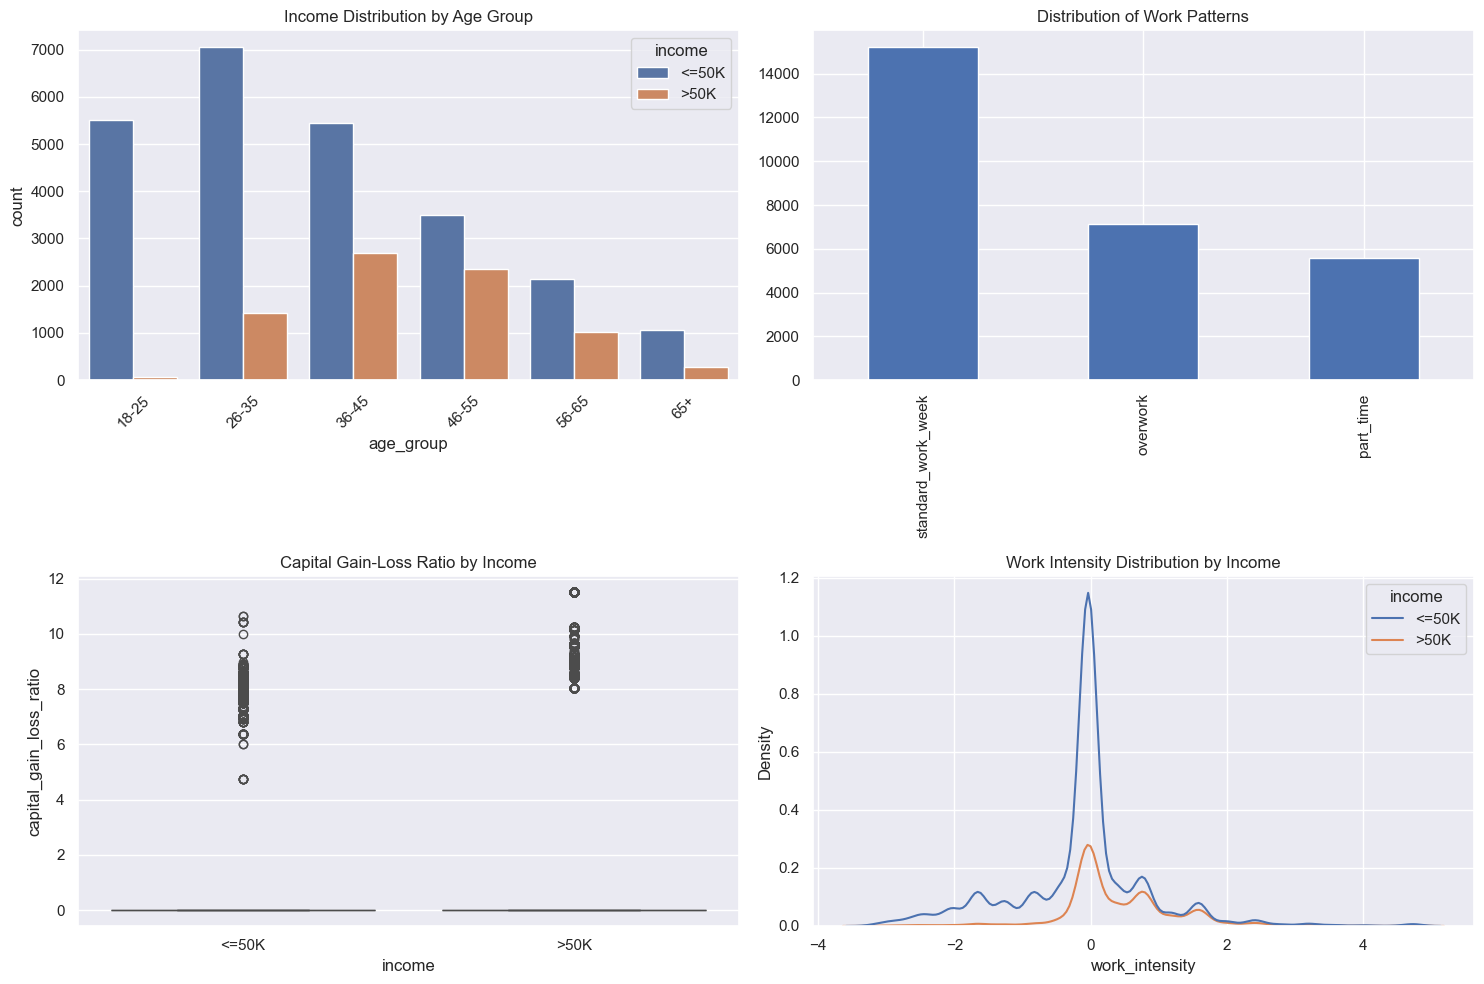

In [11]:
# Visualize the distributions
plt.figure(figsize=(15, 10))
fig = plot_feature_distributions(df)
plt.show()



In [12]:
# Brief analysis of engineered features
print("\nFeature Analysis:")
print("1. Age Distribution:")
age_income = pd.crosstab(df['age_group'], df['income'], normalize='index') * 100
print(age_income.round(2))

print("\n2. Work Pattern Analysis:")
work_income = pd.DataFrame({
    'Standard Work Week': df[df['standard_work_week'] == 1]['income'].value_counts(normalize=True),
    'Overwork': df[df['overwork'] == 1]['income'].value_counts(normalize=True),
    'Part Time': df[df['part_time'] == 1]['income'].value_counts(normalize=True)
}) * 100
print(work_income.round(2))




Feature Analysis:
1. Age Distribution:
income     <=50K   >50K
age_group              
18-25      98.90   1.10
26-35      83.17  16.83
36-45      66.84  33.16
46-55      59.88  40.12
56-65      67.65  32.35
65+        79.34  20.66

2. Work Pattern Analysis:
        Standard Work Week  Overwork  Part Time
income                                         
<=50K                78.66     58.24      93.07
>50K                 21.34     41.76       6.93


In [13]:
# Save engineered features
print("\nSaving dataset with new features...")
df.to_csv('data/adult_with_features.csv', index=False)
print("Features saved successfully!")


Saving dataset with new features...
Features saved successfully!
